<a href="https://colab.research.google.com/github/omarhala15/omar97/blob/main/Sequential_api_(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# importing various types of hidden layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam

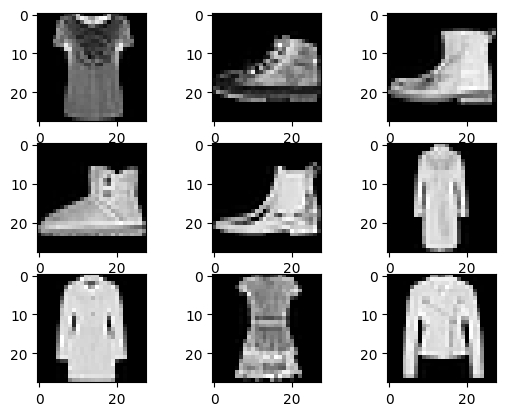

In [5]:
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_valid_categorical = to_categorical(y_valid)
print("Finished categorizing the labels (output)")

Finished categorizing the labels (output)


In [7]:
from keras.api._v2.keras import activations
models=keras.models.Sequential()
models.add(Conv2D(64,(5,5),padding='same',activation='tanh',input_shape=(28,28,1)))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Conv2D(128,(5,5),padding='same',activation='tanh'))
models.add(MaxPooling2D(pool_size=(2,2)))
#models.add(Conv2D(256,(5,5),padding='same',activation='tanh'))
#models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Flatten())
models.add(Dense(10,activation='softmax'))

In [8]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(400, activation="relu"),
 keras.layers.Dense(125, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer=Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy')

In [9]:
%%time
History=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 28s 15ms/step - loss: 0.4833 - val_loss: 0.3891
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3632 - val_loss: 0.3381
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3282 - val_loss: 0.3088
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3041 - val_loss: 0.3207
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2843 - val_loss: 0.3029
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2692 - val_loss: 0.3191
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2562 - val_loss: 0.3050
Epoch 8/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2439 - val_loss: 0.3163
Epoch 9/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2360 - val_loss: 0.2986
Epoch 10/10
1719/1719 [==============================] - 13s 8ms/step - 

In [10]:
models.compile(optimizer=Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',
                       metrics=['sparse_categorical_accuracy'])
           

In [11]:
history=models.fit(X_train,y_train,epochs=4,validation_data=(X_valid,y_valid))

Epoch 1/4
1719/1719 [==============================] - 417s 242ms/step - loss: 0.4088 - sparse_categorical_accuracy: 0.8564 - val_loss: 0.3380 - val_sparse_categorical_accuracy: 0.8836
Epoch 2/4
1719/1719 [==============================] - 412s 240ms/step - loss: 0.2905 - sparse_categorical_accuracy: 0.8970 - val_loss: 0.2873 - val_sparse_categorical_accuracy: 0.8974
Epoch 3/4
1719/1719 [==============================] - 408s 238ms/step - loss: 0.2422 - sparse_categorical_accuracy: 0.9147 - val_loss: 0.3085 - val_sparse_categorical_accuracy: 0.8936
Epoch 4/4
1719/1719 [==============================] - 416s 242ms/step - loss: 0.2070 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.2808 - val_sparse_categorical_accuracy: 0.9050


In [12]:
models.evaluate(X_test,y_test)

313/313 [==============================] - 20s 62ms/step - loss: 1.8615 - sparse_categorical_accuracy: 0.7417


[1.861496925354004, 0.7416999936103821]

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 62.0183


62.01829528808594

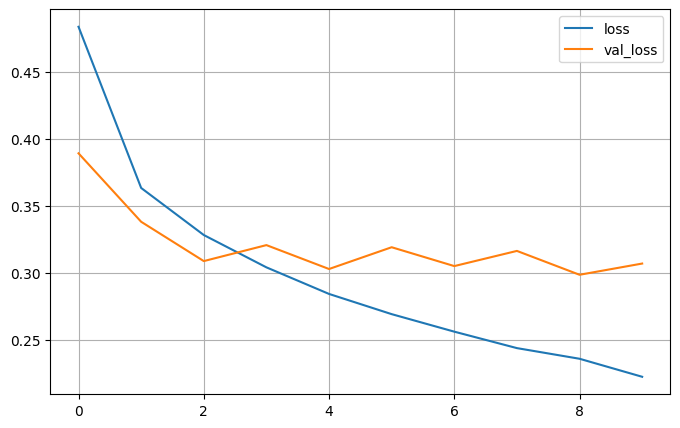

In [14]:
pd.DataFrame(History.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 62.0183


62.01829528808594

In [16]:
x_new=X_test[:3]
model.predict(x_new).round()


1/1 [==============================] - 0s 124ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_pred = np.argmax(model.predict(x_new),axis=1)
np.array(class_names)[y_pred]


1/1 [==============================] - 0s 23ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [18]:
y_pred = np.argmax(models.predict(x_new),axis=1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 79ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')